In [11]:
test = {
    'A' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 11, 12, 15, 9, 8, 7],
    'B': [1, 3 ,3, 4, 5, 5, 7, 9, 9, 10, 12, 13, 14, 15, 11, 12, 15, 9, 8, 8],
    'C': [2, 4, 6, 7, 9,12, 14, 16, 19, 20, 12, 24, 28, 29, 22, 20, 39, 18, 16, 19]
}

In [12]:
import pandas as pd
df = pd.DataFrame(test)
df

,A,B,C
0,1,1,2
1,2,3,4
2,3,3,6
3,4,4,7
4,5,5,9
5,6,5,12
6,7,7,14
7,8,9,16
8,9,9,19
9,10,10,20


<Axes: >

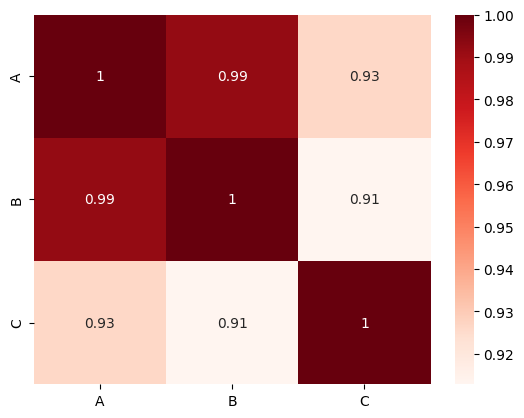

In [13]:
import seaborn as sns
sns.heatmap(df.corr(), annot = True, cmap = 'Reds')

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df.drop('C', axis = 1), df.C, test_size = 0.3, random_state= 42)

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
lr  = LinearRegression()
lr.fit(X_train, Y_train)
y_pred = lr.predict(X_test)
print(r2_score(y_pred, Y_test))
print(mean_squared_error(y_pred, Y_test))


0.9246837563475496
5.877155630151758


In [16]:
## creating New Feature
df['D'] = df['A'] + df['B']
df

,A,B,C,D
0,1,1,2,2
1,2,3,4,5
2,3,3,6,6
3,4,4,7,8
4,5,5,9,10
5,6,5,12,11
6,7,7,14,14
7,8,9,16,17
8,9,9,19,18
9,10,10,20,20


<Axes: >

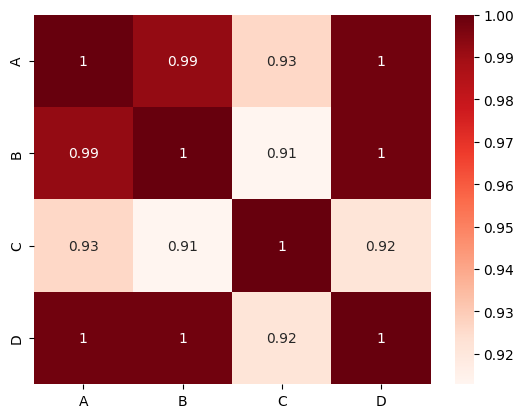

In [17]:
import seaborn as sns
sns.heatmap(df.corr(), annot = True, cmap = 'Reds')

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df.drop('C', axis = 1), df.C, test_size = 0.3,  random_state= 42)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
lr  = LinearRegression()
lr.fit(X_train, Y_train)
y_pred = lr.predict(X_test)
print(r2_score(y_pred, Y_test))
print(mean_squared_error(y_pred, Y_test))

0.9246837563475496
5.877155630151742


In [27]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse_output= False)
ohe_transfromed = ohe.fit_transform(df[['A']])
print(ohe.get_feature_names_out())
ohe_df = pd.DataFrame(ohe_transfromed, columns= ohe.get_feature_names_out())
pd.concat([df, ohe_df], axis = 1)

['A_1' 'A_2' 'A_3' 'A_4' 'A_5' 'A_6' 'A_7' 'A_8' 'A_9' 'A_10' 'A_11'
 'A_12' 'A_14' 'A_15']


,A,B,C,D,A_1,A_2,A_3,A_4,A_5,A_6,A_7,A_8,A_9,A_10,A_11,A_12,A_14,A_15
0,1,1,2,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,3,4,5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,3,6,6,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,4,7,8,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,5,9,10,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,6,5,12,11,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,7,7,14,14,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,8,9,16,17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8,9,9,19,18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9,10,10,20,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [5]:
import pandas as pd
df = pd.read_csv('HousePrice.csv')
null = df.isnull().sum()
null[null > 0]


MasVnrType     1738
MiscFeature    2801
dtype: int64